In [197]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from datetime import timedelta

Датасет - `bus_table.csv`
- `data` - дата
- `route` - название маршрута автобуса
- `direction` - направление маршрута
- `scheduled` - время прибыттия по расписанию
- `actual` - фактическое время прибытия

## Задание 1
Прочитайте файл, сохранив результаты в `df`. Посмотрите статистики и инфо.

In [198]:
df = pd.read_csv('bus_table.csv')
display(df)
df.info()
df.describe()

,data,route,direction,scheduled,actual
0,2016-03-26,A,south,01:11:57,01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39
...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50
39153,2016-05-27,B,north,13:02:27,13:07:10
39154,2016-05-27,B,north,15:14:29,15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40


<class 'pandas.core.frame.DataFrame'>
Index: 39157 entries, 0 to 39156
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   data       39157 non-null  object
 1   route      39157 non-null  object
 2   direction  39157 non-null  object
 3   scheduled  38917 non-null  object
 4   actual     39157 non-null  object
dtypes: object(5)
memory usage: 1.8+ MB


,data,route,direction,scheduled,actual
count,39157,39157,39157,38917,39157
unique,63,3,2,1356,27633
top,2016-04-14,A,north,23:00:25,08:08:24
freq,693,13358,19686,64,8


## Задание 2
Вырежте пропушеные данные (сохраните их в DataFrame `df_null`, они вам еще понадобятся) и удалите их из `df`. Выведите размерность `df_null`.

сначала посмотрим, сколько у нас пропущенных данных и где они, зачем мы до этого выводили инфо:)))

In [199]:
df.isna().sum()

data           0
route          0
direction      0
scheduled    240
actual         0
dtype: int64

тут мы закидываем пропущенные данные в df_null ииии копируем наш первоначальный датафрейм в df_null1, чтобы потом сделать последнее задание, выводим размерность df_null

In [200]:
df_null = df[df['scheduled'].isnull()]
df_null1 = df.copy()
display(df_null)
df_null.shape

,data,route,direction,scheduled,actual
383,2016-04-01,A,south,NaN,16:00:57
471,2016-03-31,A,south,NaN,15:28:05
588,2016-03-30,A,south,NaN,14:52:36
599,2016-03-30,A,south,NaN,15:12:06
685,2016-03-29,A,south,NaN,17:56:29
...,...,...,...,...,...
37327,2016-05-10,B,north,NaN,15:25:47
37328,2016-05-10,B,north,NaN,17:44:05
37570,2016-05-12,B,north,NaN,18:27:55
37670,2016-05-13,B,north,NaN,19:04:25


(240, 5)

а тут уже дропаем пропущенные данные из первоначального df

In [201]:
df.dropna(axis = 'index', subset = ['scheduled'], inplace = True)
df


,data,route,direction,scheduled,actual
0,2016-03-26,A,south,01:11:57,01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39
...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50
39153,2016-05-27,B,north,13:02:27,13:07:10
39154,2016-05-27,B,north,15:14:29,15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40


## Задание 3
1. Добавьте столбец `table` дату/время прибытия автобусов по расписанию на остановку. 
2. Добавьте столбец `arrival` дату/временя актуального прибытия автобуса на остановку.


In [202]:
df['table'] = df['data'] + ' ' + df['scheduled']
df['arrival'] = df['data'] + ' ' + df['actual']
df

,data,route,direction,scheduled,actual,table,arrival
0,2016-03-26,A,south,01:11:57,01:13:19,2016-03-26 01:11:57,2016-03-26 01:13:19
1,2016-03-26,A,south,23:19:57,23:16:13,2016-03-26 23:19:57,2016-03-26 23:16:13
2,2016-03-26,A,south,21:19:57,21:18:46,2016-03-26 21:19:57,2016-03-26 21:18:46
3,2016-03-26,A,south,19:04:57,19:01:49,2016-03-26 19:04:57,2016-03-26 19:01:49
4,2016-03-26,A,south,16:42:57,16:42:39,2016-03-26 16:42:57,2016-03-26 16:42:39
...,...,...,...,...,...,...,...
39152,2016-05-27,B,north,10:50:25,10:49:50,2016-05-27 10:50:25,2016-05-27 10:49:50
39153,2016-05-27,B,north,13:02:27,13:07:10,2016-05-27 13:02:27,2016-05-27 13:07:10
39154,2016-05-27,B,north,15:14:29,15:15:55,2016-05-27 15:14:29,2016-05-27 15:15:55
39155,2016-05-27,B,north,17:26:29,17:25:40,2016-05-27 17:26:29,2016-05-27 17:25:40


## Задание 4
1. Найдите три самых часто встречаюшихся в расписании автобусов временных интервалов (естественно для каждой возможной пары номер маршрута-направление).

2. Добавьте в таблицу столбик `inteval` - интервал по расписаню между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

3. Добавьте в таблицу столбик `arr_inteval` - интервал по фактическому между автобусами (естественно одного маршрута и направления) в МИНУТАХ.

сначала создадим столбики, а потом сделаем 1 пункт, так как нам понадобится столбик интервалов

In [203]:
df['table'] = pd.to_datetime(df['table'])
df.sort_values(by=['route', 'direction', 'table'], inplace=True)
df['interval'] = df.groupby(['route', 'direction'])['table'].diff().dt.total_seconds() / 60
df['arrival'] = pd.to_datetime(df['arrival'])
df.sort_values(by=['route', 'direction', 'arrival'], inplace=True)
df['arr_interval'] = df.groupby(['route', 'direction'])['arrival'].diff().dt.total_seconds() / 60
df

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval
19512,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN
19471,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000
19487,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333
19511,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667
19504,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000
...,...,...,...,...,...,...,...,...,...
9708,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.00,15.550000
9685,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.00,9.766667
9741,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.00,16.916667
9721,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.00,24.333333


тут находим часто встречающиеся интервалы (по 3) для каждого маршрут-направление

In [204]:
top_intervals = df.groupby(['route', 'direction', 'interval']).size().reset_index(name='count')
top_intervals = top_intervals.sort_values(by=['route', 'direction', 'count'], ascending=[True, True, False])
top_intervals = top_intervals.groupby(['route', 'direction']).head(3)
top_intervals

,route,direction,interval,count
15,A,north,12.0,1434
20,A,north,15.0,1377
4,A,north,7.0,756
69,A,south,15.0,1453
65,A,south,12.0,1312
59,A,south,8.0,710
121,B,north,15.0,1507
116,B,north,12.0,1413
108,B,north,8.0,1141
161,B,south,15.0,1391


## Задание 5
Найдите время в минутах для опоздания автобуса (+ задержка, - раньше расписания)

я использовала новые 2 датафрейма, в которых были только опоздания на >1400 и <-1400, чтобы понять, что не так с абсурдом: поняла, что при склеивании даты с временем в arrival получается проблема - если автобус должен был прийти, допустим, в 23:55, а прибыл в 00:06, то в arrival должен быть уже другой день, тут мы это починили

In [205]:
df['delay_minutes'] = (df['arrival'] - df['table']).dt.total_seconds() / 60
df.loc[df['delay_minutes'] > 1400, 'arrival'] -= timedelta(days=1)
df.loc[df['delay_minutes'] < -1400, 'arrival'] += timedelta(days=1)
df['delay_minutes'] = (df['arrival'] - df['table']).dt.total_seconds() / 60
df

,data,route,direction,scheduled,actual,table,arrival,interval,arr_interval,delay_minutes
19512,2016-03-26,A,north,00:00:25,00:05:01,2016-03-26 00:00:25,2016-03-26 00:05:01,NaN,NaN,4.600000
19471,2016-03-26,A,north,00:30:25,00:30:19,2016-03-26 00:30:25,2016-03-26 00:30:19,30.00,25.300000,-0.100000
19487,2016-03-26,A,north,01:05:25,01:10:15,2016-03-26 01:05:25,2016-03-26 01:10:15,35.00,39.933333,4.833333
19511,2016-03-26,A,north,02:10:25,02:19:10,2016-03-26 02:10:25,2016-03-26 02:19:10,65.00,68.916667,8.750000
19504,2016-03-26,A,north,05:25:28,05:24:49,2016-03-26 05:25:28,2016-03-26 05:24:49,195.05,185.650000,-0.650000
...,...,...,...,...,...,...,...,...,...,...
9708,2016-05-27,C,south,22:33:59,22:38:37,2016-05-27 22:33:59,2016-05-27 22:38:37,13.00,15.550000,4.633333
9685,2016-05-27,C,south,22:48:59,22:48:23,2016-05-27 22:48:59,2016-05-27 22:48:23,15.00,9.766667,-0.600000
9741,2016-05-27,C,south,23:03:59,23:05:18,2016-05-27 23:03:59,2016-05-27 23:05:18,15.00,16.916667,1.316667
9721,2016-05-27,C,south,23:23:59,23:29:38,2016-05-27 23:23:59,2016-05-27 23:29:38,20.00,24.333333,5.650000


## Задание 6
1. Постройте максимально качественные гистограммы (или их аналоги) для разницы интервалов между автобусами для различных маршрутов и направлений.

2. Постройте максимально качественные гистограммы (или их аналоги) времени опоздания автобуса в зависимости от маршрута и направления.

   Увидели абсурд - возращаемся к началу и латаем код ;)

c:\Users\Mi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\Mi\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

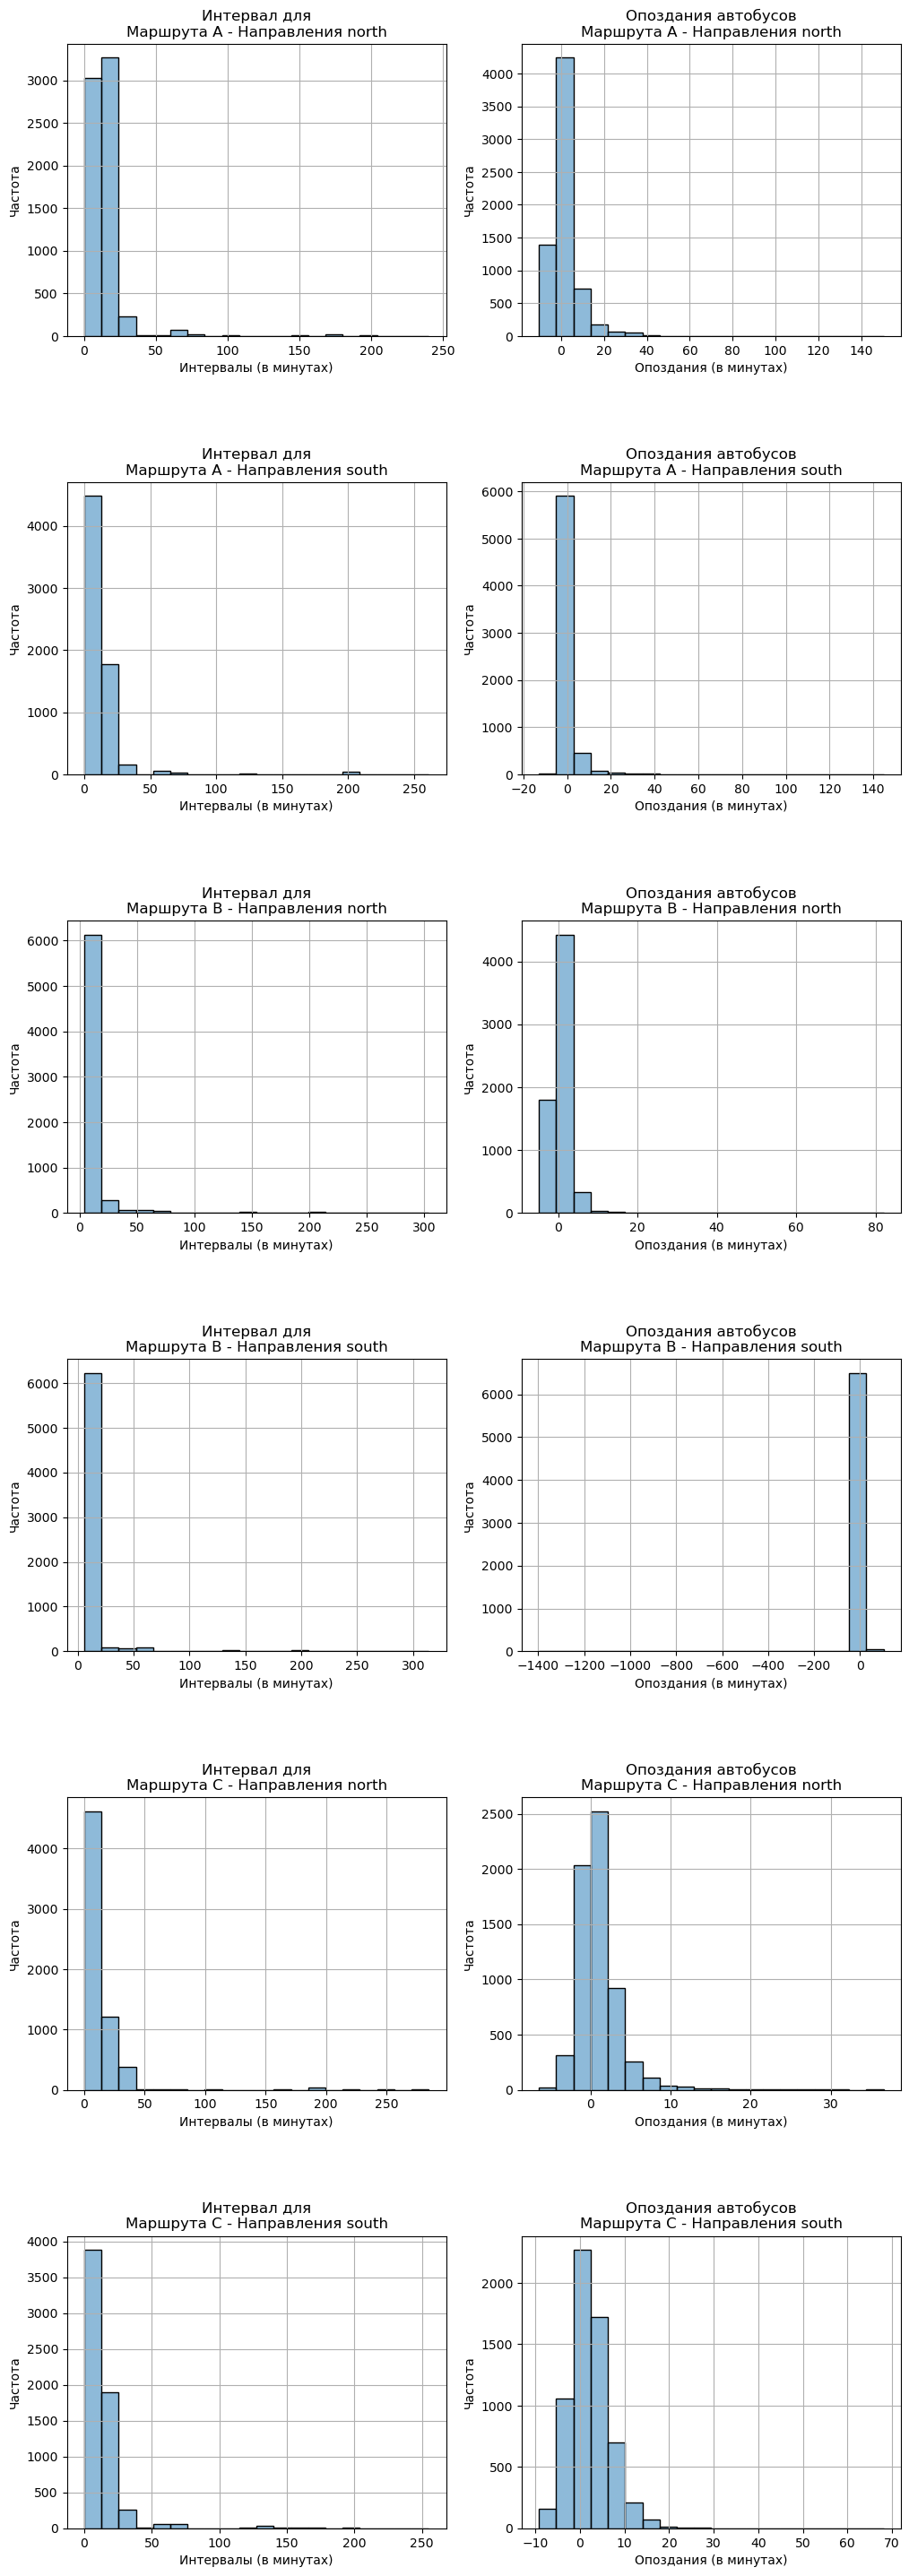

In [206]:
routes = df['route'].unique()
directions = df['direction'].unique()
num_plots = len(routes) * len(directions)
fig, axes = plt.subplots(num_plots, 2, figsize=(12, 6*num_plots))
plt.subplots_adjust(hspace=0.5)

plot_index = 0
for route in routes:
    for direction in directions:
        subset = df[(df['route'] == route) & (df['direction'] == direction)]
        
        # Гистограмма разницы интервалов между автобусами
        sns.histplot(subset['interval'], bins=20, alpha=0.5, ax=axes[plot_index, 0])
        axes[plot_index, 0].set_title(f'Интервал для\nМаршрута {route} - Направления {direction}')
        axes[plot_index, 0].set_xlabel('Интервалы (в минутах)')
        axes[plot_index, 0].set_ylabel('Частота')
        axes[plot_index, 0].grid(True)
        
        # Гистограмма времени опоздания автобуса
        sns.histplot(subset['delay_minutes'], bins=20, alpha=0.5, ax=axes[plot_index, 1])
        axes[plot_index, 1].set_title(f'Опоздания автобусов\nМаршрута {route} - Направления {direction}')
        axes[plot_index, 1].set_xlabel('Опоздания (в минутах)')
        axes[plot_index, 1].set_ylabel('Частота')
        axes[plot_index, 1].grid(True)
        
        plot_index += 1
plt.show()

#### Можно, что либо сказать о маршрутах автобусов содержательно?

##### Рассмотрим сначала гистограммы интервалов:

-для маршрута A-north характерны интервалы 15-20 минут, для маршрута A-south интервалы меньше: около 10-15 минут

-для маршрутов B-north и B-south чаще всего встречаются интервалы меньше 15 минут, а для маршрута C-north
и C-south чаще всего около 10 минут

также мы можем видеть, что у маршрута C есть значительные части интервалов менее 40 минут
для всех маршрут-направление есть интервалы более часа (особенно около 60, 150, 200 минут)

##### Рассмотрим гистограммы опозданий: 

-для всех направлений характерны опоздания до 10-20 минут, но для A-north есть значительные опоздания до 40 минут

-мы можем видеть, что все автобусы часто приходят раньше, но обычно не более 10 минут



## Задание финальное ... для тех кто может
Давайте попробуем заполнить пропущенные данные в расписании  - `df_null`. Как это сделать правильно?

In [207]:
df_null1["scheduled"] = pd.to_datetime(df['data'] + ' ' + df["scheduled"])
df_null1["scheduled"] = df_null1["scheduled"].interpolate(method='linear')
df_null['scheduled'] = df_null['scheduled'].fillna(df_null1['scheduled']).dt.strftime('%H:%M:%S')
df_null


C:\Users\Mi\AppData\Local\Temp\ipykernel_24312\4256072733.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_null['scheduled'] = df_null['scheduled'].fillna(df_null1['scheduled']).dt.strftime('%H:%M:%S')


,data,route,direction,scheduled,actual
383,2016-04-01,A,south,12:28:56,16:00:57
471,2016-03-31,A,south,07:54:57,15:28:05
588,2016-03-30,A,south,17:14:26,14:52:36
599,2016-03-30,A,south,10:19:57,15:12:06
685,2016-03-29,A,south,02:47:36,17:56:29
...,...,...,...,...,...
37327,2016-05-10,B,north,13:16:06,15:25:47
37328,2016-05-10,B,north,09:40:43,17:44:05
37570,2016-05-12,B,north,23:00:55,18:27:55
37670,2016-05-13,B,north,19:51:56,19:04:25


ну вот и все, дело в шляпе???